# Classification with Support Vector Machines (SVM), banknote

Make non-linear transformation of data and apply LSVM.

## Index
<nav>

* [Import modules](#import_modules)
* [Loading data](#loading_data)
* [Data preprocessing](#data_preprocessing)
* [Cross validation](#cross_validation)
* [Training (fit the model)](#training)
* [Test (evaluate the model)](#test)
* [References](#references)
</nav>

<a id="import_modules"></a>
## Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

<a id="loading_data"></a>
## Loading data

In [8]:
# Load training data
filename1 = 'input\\data_banknote_authentication.txt'
banknote_df = pd.read_csv(filename1, delimiter=',', header=None)
banknote_df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<a id="data_preprocessing"></a>
## Data preprocessing

In [10]:
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(banknote_df)
banknote_df = pd.DataFrame(x_scaled)

In [11]:
train_df, test_df = train_test_split(banknote_df, test_size=0.2)
print(train_df)
print(test_df)

             0         1         2         3    4
323   0.787927  0.890592  0.058427  0.406112  0.0
163   0.680967  0.865581  0.083124  0.472426  0.0
58    0.734108  0.361594  0.424589  0.867257  0.0
923   0.538722  0.479829  0.181489  0.806469  1.0
938   0.192170  0.308943  0.698951  0.740155  1.0
...        ...       ...       ...       ...  ...
1211  0.190771  0.700970  0.199762  0.279722  1.0
309   0.814162  0.803328  0.108407  0.679369  0.0
1148  0.488614  0.491212  0.209618  0.858321  1.0
1244  0.225119  0.667749  0.217517  0.584950  1.0
1289  0.406197  0.435848  0.223238  0.759791  1.0

[1097 rows x 5 columns]
             0         1         2         3    4
624   0.843613  0.801240  0.123282  0.664666  0.0
783   0.541994  0.641115  0.033588  0.409640  1.0
648   0.563915  0.739062  0.279157  0.745210  0.0
262   0.638463  0.800001  0.185552  0.552970  0.0
549   0.762312  0.542160  0.311750  0.953445  0.0
...        ...       ...       ...       ...  ...
664   0.894266  0.655903 

<a id="cross_validation"></a>
## Cross validation

Using [k-fold cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold) in order to find good values for all the parameters of SVM: kernel, and parameters.

K-fold ---------------------------------------------------------------
Model accuracy: 1.0


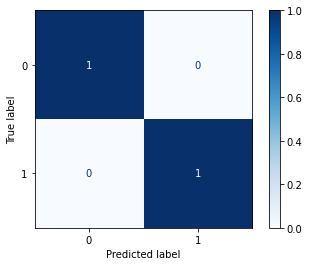

Confusion matrix:
 [[165   0]
 [  0 110]]
Percentage classification error obtained from validation set: 0.0%
K-fold ---------------------------------------------------------------
Model accuracy: 1.0


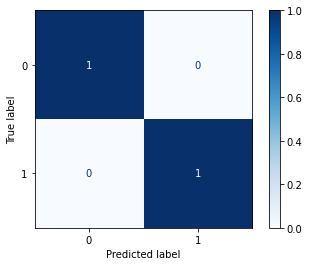

Confusion matrix:
 [[144   0]
 [  0 130]]
Percentage classification error obtained from validation set: 0.0%
K-fold ---------------------------------------------------------------
Model accuracy: 1.0


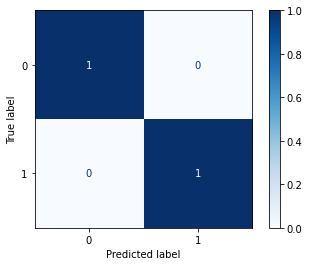

Confusion matrix:
 [[145   0]
 [  0 129]]
Percentage classification error obtained from validation set: 0.0%
K-fold ---------------------------------------------------------------
Model accuracy: 1.0


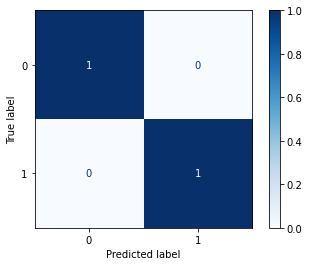

Confusion matrix:
 [[148   0]
 [  0 126]]
Percentage classification error obtained from validation set: 0.0%
Mean percentage classification error obtained from cross validation: 0.0%


In [16]:
X_train = train_df.iloc[:,0:4].to_numpy()
y_train = train_df.iloc[:,4].astype(int).to_numpy()

cv_percentage_classification_errors = list()

# 4-fold cross-validation
kf = KFold(n_splits=4)
for train, validation in kf.split(X_train):
    print('K-fold ---------------------------------------------------------------')
    
    # Create the SVM estimator
    clf = SVC(kernel='rbf', random_state=0)
    
    # Train the model using the training set
    clf.fit(X_train[train], y_train[train])

    # Generate predictions
    y_pred = clf.predict(X_train[validation])
    
    # Evaluate by means of accuracy
    accuracy = accuracy_score(y_train[validation], y_pred)
    print(f'Model accuracy: {accuracy}')
    
    # Evaluate by means of a confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_train[validation], y_pred,
                                                   labels=clf.classes_,
                                                   display_labels=clf.classes_,
                                                   cmap=plt.cm.Blues,
                                                   normalize='true')
    plt.show()
    
    cm = confusion_matrix(y_train[validation], y_pred)
    print('Confusion matrix:\n', cm)

    # Calculate the percentage classification error obtained from validation test
    percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
    print(f'Percentage classification error obtained from validation set: {percentage_classification_error}%')
    
    cv_percentage_classification_errors.append(percentage_classification_error)
    
# Calculate the mean percentage classification error obtained from cross-validation
print(f'Mean percentage classification error obtained from cross validation: {np.mean(cv_percentage_classification_errors)}%')

<a id="training"></a>
## Training (fit the model)

In [17]:
# Create the SVM estimator
clf = SVC(kernel='rbf', random_state=0)
print('Names and current values for all parameters for the estimator: ', clf.get_params())

# Train the model using 'all' the training set
clf.fit(X_train, y_train)

Names and current values for all parameters for the estimator:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


SVC(random_state=0)

<a id="test"></a>
## Test (evaluate the model)

Model accuracy: 1.0


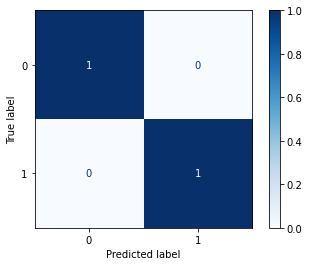

Confusion matrix:
 [[160   0]
 [  0 115]]
Percentage classification error obtained from test set: 0.0%


In [19]:
X_test = test_df.iloc[:,0:4].to_numpy()
y_test = test_df.iloc[:,4].astype(int).to_numpy()

# Generate predictions
y_pred = clf.predict(X_test)

# Evaluate by means of accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model accuracy: {accuracy}')

# Evaluate by means of a confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                               labels=clf.classes_,
                                               display_labels=clf.classes_,
                                               cmap=plt.cm.Blues,
                                               normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Calculate the percentage classification error obtained from test set
percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')

In [20]:
banknote_svm_results = {'real_value': y_test,
                    'prediction': y_pred}
  
df = pd.DataFrame(banknote_svm_results)

df.to_csv('banknote_svm_results.csv')

<a id="references"></a>
## References:

Support Vector Machines:

- [A Practical Guide to Support Vector Classification](https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf)
- https://scikit-learn.org/stable/modules/svm.html#classification
- [Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
- https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
- [How do I select SVM kernels?](https://sebastianraschka.com/faq/docs/select_svm_kernels.html)
- [RBF SVMs with Python and Scikit-learn: an Example](https://www.machinecurve.com/index.php/2020/11/25/using-radial-basis-functions-for-svms-with-python-and-scikit-learn/#:~:text=the%20RBF%20kernel.-,RBF%20SVMs%20with%20Python%20and%20Scikit%2Dlearn%3A%20an%20Example,-We%20can%20easily)
- [RBF SVM parameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

Data Visualization:

- [Seaborn Library for Data Visualization in Python: Part 1](https://stackabuse.com/seaborn-library-for-data-visualization-in-python-part-1)

Cross Validation:

- [Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)
- [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimato)
- [Parameter estimation using grid search with cross-validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py)

Data Preprocessing:

- [sklearn.preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
- [Guide to Encoding Categorical Values in Python](https://pbpython.com/categorical-encoding.html)